# 1. Data Exploration

In [4]:
import urllib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import PIL
import os
from pathlib import Path

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

from sklearn import set_config; set_config(display='diagram')

## 1.1) Load Data

In [5]:
LOCAL_DATA_PATH = Path('~').joinpath(".miperson", "mlops", "data").expanduser()
GCP_PROJECT = "mi-person.light-processor-388701"
BQ_DATASET = "emotions"
GCP_PROJECT = "light-processor-388701"
COLUMN_NAMES_RAW = ('*')

In [6]:
query_classes = f"""
    SELECT {",".join(COLUMN_NAMES_RAW)}
    FROM {BQ_DATASET}.classes
    """
print(query_classes)


    SELECT *
    FROM emotions.classes
    


In [7]:
def bq_query(q, table):
    data_query_cache_path = Path(LOCAL_DATA_PATH).joinpath("raw", f"{BQ_DATASET}_{table}.csv")
    print(data_query_cache_path)
    if data_query_cache_path.is_file():
        print("load local file...")
        df = pd.read_csv(data_query_cache_path)
        return df
        
    else:
        print("Querying Big Query server...")
        from google.cloud import bigquery
        
        client = bigquery.Client(project=GCP_PROJECT)
        query_job = client.query(q)
        result = query_job.result() 
        df = result.to_dataframe()
        
        return df.to_csv(data_query_cache_path, header=True, index=False)


In [8]:
classes = bq_query(query_classes, 'classes')

/home/tatchiwiggers/.miperson/mlops/data/raw/emotions_classes.csv
load local file...


In [9]:
classes = pd.read_csv('/home/tatchiwiggers/.miperson/mlops/data/raw/emotions_classes.csv')
classes

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eey9wru,XD,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,edkjb9g,(:),True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,eerg0xa,:((,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ed10w2o,:^),True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ed10w2o,:^),True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,eeddh9k,Communism naturally results in dictatorship. W...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
211221,eeddh9k,Communism naturally results in dictatorship. W...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
211222,ef0rf7q,For your kindness to mobile users I give a pla...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
211223,ef0rf7q,For your kindness to mobile users I give a pla...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
classes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    211225 non-null  object
 1   text                  211225 non-null  object
 2   example_very_unclear  211225 non-null  bool  
 3   admiration            211225 non-null  int64 
 4   amusement             211225 non-null  int64 
 5   anger                 211225 non-null  int64 
 6   annoyance             211225 non-null  int64 
 7   approval              211225 non-null  int64 
 8   caring                211225 non-null  int64 
 9   confusion             211225 non-null  int64 
 10  curiosity             211225 non-null  int64 
 11  desire                211225 non-null  int64 
 12  disappointment        211225 non-null  int64 
 13  disapproval           211225 non-null  int64 
 14  disgust               211225 non-null  int64 
 15  embarrassment    

In [11]:
query_pnn = f"""
    SELECT *
    FROM {BQ_DATASET}.pos_neg_neutral
    """
print(query_pnn)


    SELECT *
    FROM emotions.pos_neg_neutral
    


In [12]:
pos_neg_neutral = bq_query(query_pnn, 'pos_neg_neutral')

/home/tatchiwiggers/.miperson/mlops/data/raw/emotions_pos_neg_neutral.csv
load local file...


In [13]:
pnn = pd.read_csv('/home/tatchiwiggers/.miperson/mlops/data/raw/emotions_pos_neg_neutral.csv')
pnn

,int64_field_0,text,positive,neutral,negative
0,118619,XD,0,1,0
1,188631,XD,0,1,0
2,111828,ok,0,1,0
3,131731,ok,0,1,0
4,158737,ok,0,1,0
...,...,...,...,...,...
192519,61045,I seen reactions to this elsewhere and DAM fam...,1,0,0
192520,131200,Wow that's so lit🔥🔥🔥😂😂💦💦💦 im so proud of your ...,1,0,0
192521,59642,For your kindness to mobile users I give a pla...,1,0,0
192522,104547,THINK OF THE😤😤😤GENERATIONS OF NEWS🇺🇸😞🇺🇸THAT GE...,1,0,0


### 1.1.1) Compress Data

Let's compress our DataFrame by lowering its numeric `dtypes`
- from  `float64` to `float32`
- from `int64` to `int8`

To do so, we iterate on its columns, and for each one, reduce its `dtypes` as much as possible using [`pd.to_numeric`](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html)

**💡 1) Read more about `dtype` compression in the ML Ops - Train at Scale lecture on Kitt, "Appendix A1: Memory Optimization"**

**💡 2) Then, understand and execute the following code**

In [14]:
def compress(df, **kwargs):
    """
    Reduces the size of the DataFrame by downcasting numerical columns
    """
    input_size = df.memory_usage(index=True).sum()/ 1024**2
    print("old dataframe size: ", round(input_size,2), 'MB')
    
    in_size = df.memory_usage(index=True).sum()

    for t in ["float", "integer"]:
        l_cols = list(df.select_dtypes(include=t))

        for col in l_cols:
            df[col] = pd.to_numeric(df[col], downcast=t)

    out_size = df.memory_usage(index=True).sum()
    ratio = (1 - round(out_size / in_size, 2)) * 100
    
    print("optimized size by {} %".format(round(ratio,2)))
    print("new DataFrame size: ", round(out_size / 1024**2,2), " MB")

    return df

In [15]:
classes = compress(classes, verbose=True)
classes.head(1)

old dataframe size:  48.55 MB
optimized size by 81.0 %
new DataFrame size:  9.06  MB


,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eey9wru,XD,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
pnn = compress(pnn, verbose=True)
pnn.head(1)

old dataframe size:  7.34 MB
optimized size by 62.0 %
new DataFrame size:  2.75  MB


,int64_field_0,text,positive,neutral,negative
0,118619,XD,0,1,0


In [17]:
classes.dtypes

id                      object
text                    object
example_very_unclear      bool
admiration                int8
amusement                 int8
anger                     int8
annoyance                 int8
approval                  int8
caring                    int8
confusion                 int8
curiosity                 int8
desire                    int8
disappointment            int8
disapproval               int8
disgust                   int8
embarrassment             int8
excitement                int8
fear                      int8
gratitude                 int8
grief                     int8
joy                       int8
love                      int8
nervousness               int8
optimism                  int8
pride                     int8
realization               int8
relief                    int8
remorse                   int8
sadness                   int8
surprise                  int8
neutral                   int8
dtype: object

In [18]:
pnn.dtypes

int64_field_0     int32
text             object
positive           int8
neutral            int8
negative           int8
dtype: object

## 1.2) Clean Data

In [19]:
classes.describe()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
count,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,...,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000
mean,0.081103,0.043768,0.038272,0.064472,0.083418,0.028401,0.034840,0.045885,0.018071,0.040095,...,0.038779,0.008569,0.041259,0.006164,0.041591,0.006102,0.011954,0.031994,0.026105,0.261797
std,0.272994,0.204580,0.191853,0.245592,0.276514,0.166116,0.183374,0.209236,0.133208,0.196182,...,0.193067,0.092172,0.198890,0.078269,0.199653,0.077880,0.108679,0.175985,0.159448,0.439614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
classes.shape

(211225, 31)

In [21]:
classes = classes.drop_duplicates()
classes.shape

(154488, 31)

In [22]:
pnn.describe()

,int64_field_0,positive,neutral,negative
count,192524.000000,192524.000000,192524.000000,192524.000000
mean,105539.750795,0.441296,0.287227,0.271478
std,60967.355358,0.496543,0.452469,0.444723
min,0.000000,0.000000,0.000000,0.000000
25%,52765.500000,0.000000,0.000000,0.000000
50%,105512.500000,0.000000,0.000000,0.000000
75%,158320.250000,1.000000,1.000000,1.000000
max,211223.000000,1.000000,1.000000,1.000000


In [23]:
pnn.shape

(192524, 5)

In [24]:
pnn = pnn.drop_duplicates()
pnn.shape

(192524, 5)

## 1.3) Visualize Data

Text(0.5, 1.0, 'Count per class')

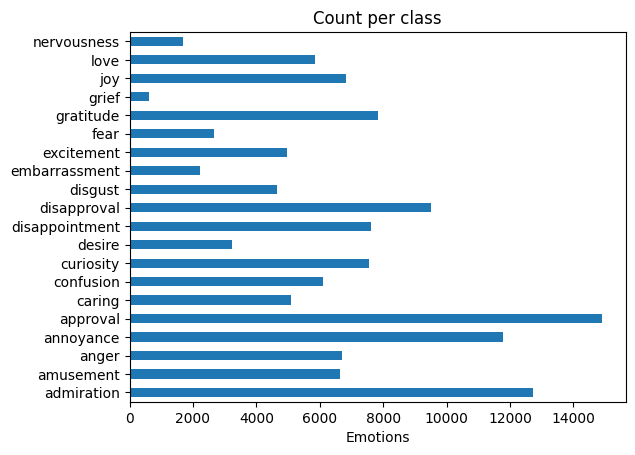

In [47]:
# Plot histogram of emotions

X_classes = classes.drop(columns=['id',	'text',	'example_very_unclear'])

X_classes.sum()[:20].plot(kind='barh')
plt.xlabel('Emotions')
plt.title('Count per class')


Text(0.5, 1.0, 'Count per class')

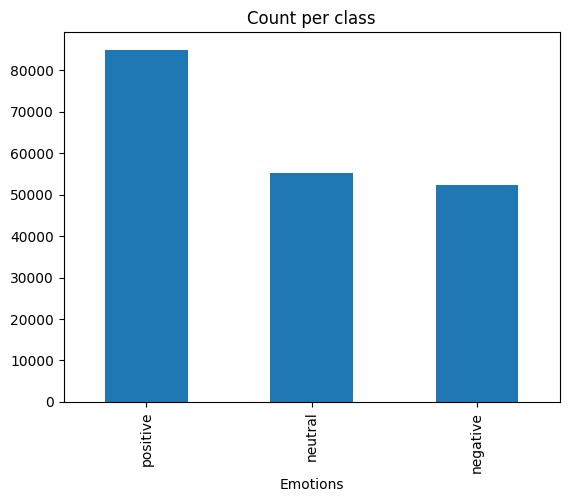

In [48]:
X_pnn = pnn.drop(columns=['int64_field_0','text'])

X_pnn.sum()[:20].plot(kind='bar')
plt.xlabel('Emotions')
plt.title('Count per class')
